# **Dan Burke**
**Homework Two**

IST 652

September 3, 2023

**Link to Student Virtual Environment:** https://colab.research.google.com/drive/1wnCZNoSYmpqu9mdgub3PHFwNovEysjcN?usp=sharing


**Semistructured Data Processing**

The main outline of your assignment is to write a program that will read in JSON formatted data
from a Mongo DB collection or from a file.

This will be in a format that is structured with lines of
data representing one type of unit, for example, one tweet for Twitter or one post from
Facebook.

Your program will contain the data as lists of JSON structures, which are just Python
dictionaries and lists.
Your program may also contain pandas dataframes for processed data.

# **Data Import**

In [118]:
#Mount Google Drive
from google.colab import drive

#import libraries
import json
import pandas as pd
import matplotlib.pyplot as plt

#Data Source: https://www.kaggle.com/datasets/rtatman/iris-dataset-json-version?resource=download

# Data Path
path = '/content/drive/MyDrive/IST 652 HW2/iris.json'

# **Method Definitions**

In [119]:
#Define a Method to read JSON file from a given path/directory
def ReadJsonFile(path):
  with(open(path, "r") as f):
    #load the data
    data = json.load(f)
    f.close()
    return data

# Define a method which can take previously fetched
# json data ("ReadJsonFile" method above)
# and then dynamically create a dataframe via a list of column names
# with corresponding json object attributes/properties
def ConstructDataFrameFromJson(rawJson, attributeList):

  # First create an empty dataframe with columns named according to
  #user inputted parameters
  df = pd.DataFrame(columns= attributeList)
  print("Creating Empty Dataframe with column names: \n",df.columns, '\n')

  #Iterate through each json object ( will be a row in our new dataframe)
  #tracking index for insertion into dataframe
  index = 0
  for i in rawJson:
    # Then For each json object we have to iterate through each property/attribute
    # Using theattribute list

    # Create a list to temp store attributes to be inserted into row
    tempAttributList = []

    for x in attributeList:
      tempAttributList.append(i[x])

    # Add row data to dataframe
    df.loc[index] = tempAttributList

    # Increment the index
    index += 1

  print("Returning Populated Dataframe with ", len(df.index), "records/rows")
  # Return the new populated dataframe
  return df



# **Method Usage - Fetching JSON Data; Generation of DataFrame**

In [120]:
#Define the known json attribute list for constructing the dataframe
attList = ["sepalLength", "sepalWidth", "petalLength","petalWidth", "species"]

#create and store dataframe from json
df = ConstructDataFrameFromJson(ReadJsonFile(path), attList)

Creating Empty Dataframe with column names: 
 Index(['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'species'], dtype='object') 

Returning Populated Dataframe with  150 records/rows


**Clean Up Dataframe Data Types**

**NOTE:**The adjustment for datatypes is not included within the dataset agnostic methods above, the purpose for this is to allow the ablove methods to remain as flexible as possible and to not be tailored to suit any single JSON datset bold text

In [121]:
df['species'] =  df['species'].astype(str)

In [122]:
df.dtypes


sepalLength    float64
sepalWidth     float64
petalLength    float64
petalWidth     float64
species         object
dtype: object

**Question:**
Process one collection of data and summarize information from a number of fields. This
is similar to the example programs for Twitter hashtags or Facebook counts but must access
different and more fields than in those examples.

**Approach to Answer:**

The dataset selected for this effort is "Iris" data set; a common dataset used within academic/student circles, however the only difference from most instances of this data set and this effort's; is that it's original form is in JSON (JavaScript Object Notation).

The dataset as whole is in itself a "collection" (if we are to examine it in the sense of a NoSQL database/MongoDB) a MongoDB collection is analogous to a table (if viewed from a SQL/tabular perpective). Within this context, this efforts dataset, **is considered to be a single collection**, though it could be extracted/processed into multiple collections (each speicies could be it's own dataframe or collection).

The following code will produce summary staticstics to examine the various fields of the dataset as well as the individual species contained within the Iris collection (now dataframe).

# **Custom Method Definition**

Below is a method with recieves a dataframe and a singular column name (in the form of a string). Then utilizing the column name as a string will return the min, max, mean values of that column as well as generating a box plot of the column values.

This method also has a catch for any column of a string datatype, as this effort is not interesting in non numrical data for exploratory statistics.

In [123]:
def is_string(x):
    return isinstance(x, str)

def produceExploratoryStatisticsOfColumn(df, colName):
  # Handle label/species column differently to prevent errors
  # This checks for a column data type of string if it is we catch it
  if(df[colName].apply(is_string)):
    print("Species Unique Values:","\nCounts:\n", df[colName].value_counts(), df[colName].unique())
    return

  print("Summary Statistics for Column: ", colName)
  print("Maximum Value: ", df[colName].max())
  print("Minimum Value: ", df[colName].min())
  print("Mean:", df[colName].mean())
  print('\n')
  plt.figure()   # plots figure for each iteration
  plt.title(colName)
  plt.boxplot(df[colName])


# **Use of Custom Exploratory Method**

Summary Statistics for Column:  sepalLength
Maximum Value:  7.9
Minimum Value:  4.3
Mean: 5.843333333333334


Summary Statistics for Column:  sepalWidth
Maximum Value:  4.4
Minimum Value:  2.0
Mean: 3.0573333333333337


Summary Statistics for Column:  petalLength
Maximum Value:  6.9
Minimum Value:  1.0
Mean: 3.7580000000000005


Summary Statistics for Column:  petalWidth
Maximum Value:  2.5
Minimum Value:  0.1
Mean: 1.1993333333333336


Species Unique Values: 
Counts:
 setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64 ['setosa' 'versicolor' 'virginica']


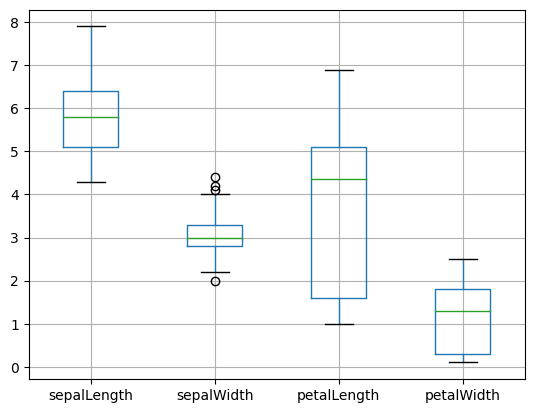

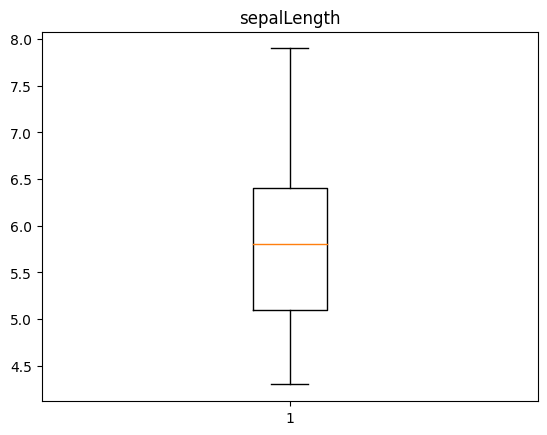

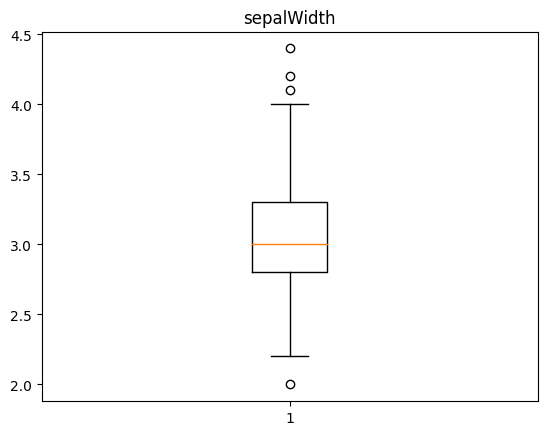

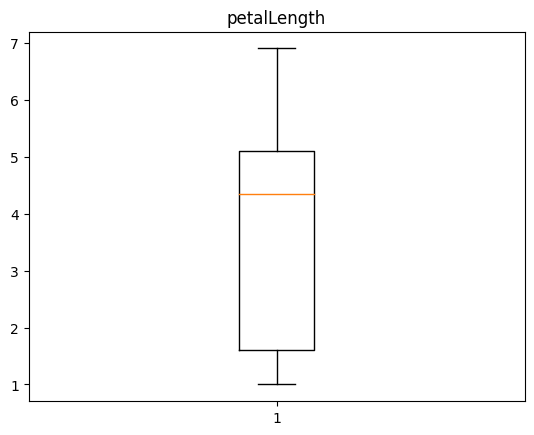

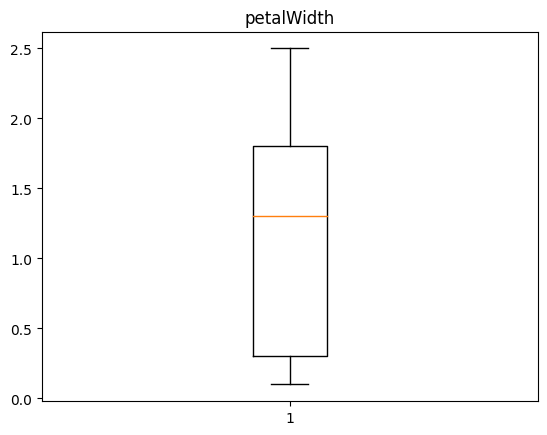

In [124]:
df.boxplot()

for col in df.columns:
  produceSummaryStatisticsOfColumn(df, col)